<a href="https://colab.research.google.com/github/sasansharifipour/EDA/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

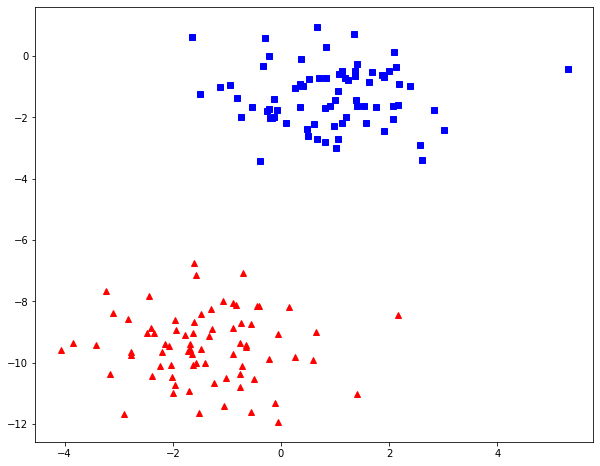

In [1]:
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np

X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')

In [2]:
def step_func(z):
        return 1.0 if (z > 0) else 0.0

In [3]:
def perceptron(X, y, alpha, epochs):
    m, n = X.shape
    theta = np.zeros((n+1,1))
    n_miss_list = []
    
    for epoch in range(epochs):
        n_miss = 0
        for idx, x_i in enumerate(X):
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)
            y_hat = step_func(np.dot(x_i.T, theta))
            
            if (np.squeeze(y_hat) - y[idx]) != 0:
                theta += alpha * ((y[idx] - y_hat)*x_i)
                n_miss += 1

        n_miss_list.append(n_miss)
        
    return theta, n_miss_list

In [4]:
def plot_decision_boundary(X, theta):
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    
    plt.plot(x1, x2, 'y-')

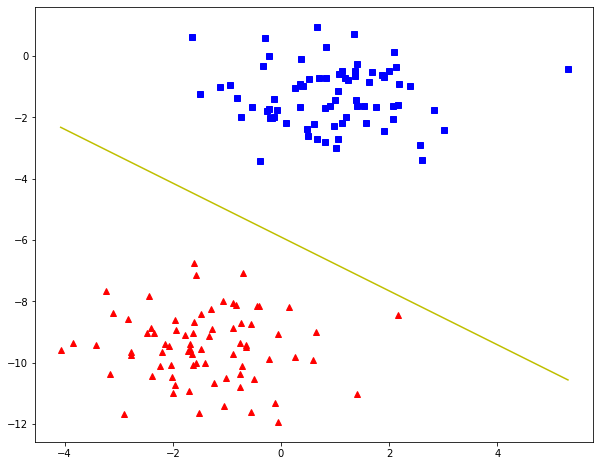

In [5]:
theta, miss_l = perceptron(X, y, 1, 100)
plot_decision_boundary(X, theta)